# Data Wrangling



## Table of Content
- Introduction
- Data wrangling - Gathering, Assessing and Cleaning
- Visualization



## Introduction
Working with real-world data means working with dirty data that requires cleaning. Data was gathered from different sources and imported in different ways, assessed and cleaned.

##### Data Used
- Twitter archive file: downloaded this file "twitter_archive_enhanced.csv" manually from project resources.
- The tweet image predictions: download the file programaticilly using request liberary
- Twitter API & JSON queryed this using the api and saved the file programatically

## Gathering Data

In [1]:
#load necessary libraries
import pandas as pd
import numpy as np
import requests
import json
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#read twitter archive using pandas and view using head()
twit_arch = pd.read_csv('twitter-archive-enhanced.csv')
twit_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#create a folder for image predictions using os
img_pred = 'image_predicions'
if not os.path.exists(img_pred):
    os.makedirs(img_pred)

In [4]:
#Use Requests to programmaicaly download the data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
source = requests.get(url)

with open('image_predictions.tsv', mode='wb') as file:
    file.write(source.content)

In [5]:
#load the data using pandas
image_prediction = pd.read_csv('image_predictions.tsv', sep='\t')

In [6]:
#View the data
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Using Twitter Api

In [7]:
#load libraries needed
import tweepy as tweepy
import json
from tweepy.parsers import JSONParser
from tweepy import OAuthHandler
import string
from timeit import default_timer as timer

In [8]:
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [9]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, 
                 wait_on_rate_limit=True)

In [10]:
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twit_arch.tweet_id.values
len(tweet_ids)

2356

In [11]:
#Read tweet-json.txt file line by line and convert into a dataframe
with open('tweet-json.txt') as file:
    lines = file.readlines()
    
    
data = []
for line in lines:
    data.append(json.loads(line))
    
json_file = pd.DataFrame(data)

In [12]:
#view the table
json_file.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


In [13]:
#view column names to know which to extract for analysis. 
#Avoid columns with no data
json_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [14]:
#Assign selected columns to json_file
json_file = json_file[['id', 'retweet_count', 'favorite_count', 'lang']]

In [15]:
json_file.head()

,id,retweet_count,favorite_count,lang
0,892420643555336193,8853,39467,en
1,892177421306343426,6514,33819,en
2,891815181378084864,4328,25461,en
3,891689557279858688,8964,42908,en
4,891327558926688256,9774,41048,en


## Assessing the Data

In [16]:
#Print the first five rows of the 3 tables and merge them together later on before cleaning
twit_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [17]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
json_file.head()

,id,retweet_count,favorite_count,lang
0,892420643555336193,8853,39467,en
1,892177421306343426,6514,33819,en
2,891815181378084864,4328,25461,en
3,891689557279858688,8964,42908,en
4,891327558926688256,9774,41048,en


### Assess Programmatically

#### Twitter Archive

In [19]:
#check the summary of the table
twit_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
#check the dimension of the data
twit_arch.shape

(2356, 17)

In [21]:
#check the statistical summary of the data
twit_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [22]:
#check for duplicated values
twit_arch.duplicated().sum()

0

In [23]:
#check the value count of rating_numerator
twit_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [24]:
#check the value count of rating_denominator
twit_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [25]:
#check for missing values
twit_arch.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [26]:
#check for name column value count
twit_arch.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [27]:
#check for source column value count
twit_arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### Image Prediction 

In [28]:
#check for data summary
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
#check for data dimension
image_prediction.shape

(2075, 12)

In [30]:
#check for data summary statistics
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [31]:
#check for duplicates in data
image_prediction.duplicated().sum()

0

In [32]:
#check for null values in data
image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

#### Json File

In [33]:
#check for data summary
json_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   lang            2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [34]:
#check for data dimension
json_file.shape

(2354, 4)

In [35]:
#check for data summary statistics
json_file.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [36]:
json_file.duplicated().sum()

0

In [37]:
json_file.isnull().sum()

id                0
retweet_count     0
favorite_count    0
lang              0
dtype: int64

# Data Quality


#### Twitter Archive
- Keep only original ratings that have images.
- Delete columns that won’t be used for the analysis.
- Correct numerators (outliers) and convert to float
- Convert denominators to float
- Correct the incorrect dogs names; Error in dog names (e.g a,an,actually) are not a dog's name.
- Erroneous datatypes (Change tweet_id from type interger to object type, change 'timestamp' from object to datetime)

#### Image Predictions
- Change tweet_id from type interger to object type
- Drop duplicated image predictions


#### Json File
- Change 'id' to 'tweet_id'
- Erroneous datatypes (Change tweet_id from type interger to object type)



# Tidiness

#### Twitter Archive
- Separate timestamp into day -month -year.
- doggo, floofer, pupper and puppo columns in twitter_archive table should be merged into one column named "dog_stage"

#### Image Predictions
- Merge with Twitter Archive

#### Json File
 - Merge with Twitter Archive

# Cleaning

In [38]:
#create copies of your data
twit_arch_clean = twit_arch.copy()
img_pred_clean =  image_prediction.copy()
json_file_clean = json_file.copy()

In [39]:
#check if change was effective
twit_arch_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Define
 
Keep original ratings (no retweets) that have images


### Code

In [40]:
# check for missing values in retweeted status user id
twit_arch_clean['retweeted_status_user_id'].isna().sum()

2175

In [41]:
#Delete retweets by filtering the NaN of retweeted_status_user_id
twit_arch_clean = twit_arch_clean[pd.isnull(twit_arch_clean['retweeted_status_user_id'])]

### Test

In [42]:
#check if change was effective
twit_arch_clean.retweeted_status_user_id.value_counts().sum()

0

### Define
Delete columns that won’t be used for the analysis.



### Code

In [43]:
# Check list of colums in twitter_archieve
twit_arch_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [44]:
# Drop columns no needed
twit_arch_clean.drop(['source', 'in_reply_to_status_id', 'in_reply_to_user_id',
                           'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
                           'expanded_urls'], axis=1, inplace=True)

### Test

In [45]:
# check if change was effective
twit_arch_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Define

Correct numerators with decimals and convert to float


### Code

In [46]:
# check to see if some columns were not extracted properly to capture decimals
with pd.option_context('max_colwidth', 200):
    display(twit_arch_clean[twit_arch_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\Toyin Alade\AppData\Local\Temp\ipykernel_1880\2274737792.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  display(twit_arch_clean[twit_arch_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [47]:
# convert to float datatype
twit_arch_clean[['rating_numerator', 'rating_denominator']] = twit_arch_clean[['rating_numerator','rating_denominator']].astype(float)

#update values
twit_arch_clean.loc[(twit_arch_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twit_arch_clean.loc[(twit_arch_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twit_arch_clean.loc[(twit_arch_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twit_arch_clean.loc[(twit_arch_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twit_arch_clean.loc[(twit_arch_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

### Test

In [48]:
#confirm changes
with pd.option_context('max_colwidth', 200):
    display(twit_arch_clean[twit_arch_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\Toyin Alade\AppData\Local\Temp\ipykernel_1880\2880379037.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  display(twit_arch_clean[twit_arch_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


In [49]:
twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   text                2175 non-null   object 
 3   rating_numerator    2175 non-null   float64
 4   rating_denominator  2175 non-null   float64
 5   name                2175 non-null   object 
 6   doggo               2175 non-null   object 
 7   floofer             2175 non-null   object 
 8   pupper              2175 non-null   object 
 9   puppo               2175 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 186.9+ KB


### Define

Correct the incorrect dogs names; Error in dog names (e.g a,an,actually) are not a dog's name.

### Code


In [50]:
# Check for unique names
sorted(twit_arch_clean['name'].unique())

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


In [51]:
#check value counts of name column
twit_arch_clean['name'].value_counts().head(19)

None       680
a           55
Lucy        11
Charlie     11
Cooper      10
Oliver      10
Tucker       9
Penny        9
Lola         8
the          8
Winston      8
Sadie        8
Daisy        7
Toby         7
Stanley      6
Jax          6
Bella        6
an           6
Bo           6
Name: name, dtype: int64

In [52]:
# convert incorrect list of names to None
not_name_list = ['a',
 'actually',
 'all',
 'an',
 'by',
 'getting',
 'his',
 'incredibly',
 'infuriating',
 'just',
 'life',
 'light',
 'mad',
 'my',
 'not',
 'officially',
 'old',
 'one',
 'quite',
 'space',
 'such',
 'the',
 'this',
 'unacceptable',
 'very']
for i in not_name_list:
        twit_arch_clean['name'].replace(i, 'None', inplace=True)

### Test

In [53]:
# Check for change
twit_arch_clean['name'].value_counts()

None          784
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 931, dtype: int64

### Define

Erroneous datatypes (Change tweet_id to type interger from object type, change 'timestamp' from object to datetime)

### Code

In [54]:
# Convert 'tweet_id' to Object with astype and 'timestamp' to datetime
twit_arch_clean['tweet_id'] = twit_arch_clean['tweet_id'].astype('str')

twit_arch_clean['timestamp'] = pd.to_datetime(twit_arch_clean['timestamp'])

### Test

In [55]:
twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   rating_numerator    2175 non-null   float64            
 4   rating_denominator  2175 non-null   float64            
 5   name                2175 non-null   object             
 6   doggo               2175 non-null   object             
 7   floofer             2175 non-null   object             
 8   pupper              2175 non-null   object             
 9   puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), object(7)
memory usage: 186.9+ KB


### Define
Change tweet_id to type interger from object type

### Code

In [56]:
#Change tweet_id to type interger from object type with astype
img_pred_clean['tweet_id'] = img_pred_clean['tweet_id'].astype('str')

### Test

In [57]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Define

Change 'id' to 'tweet_id'

### Code

In [58]:
# Change 'id' to 'tweet_id'
json_file_clean.rename(columns={'id' : 'tweet_id'}, inplace=True)

### Test

In [59]:
json_file_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'lang'], dtype='object')

### Define

Erroneous datatypes (Change tweet_id from type interger to object type)


### Code

In [60]:
#Change datatype to object with astype
json_file_clean['tweet_id'] = json_file_clean['tweet_id'].astype('str')

### Test

In [61]:
json_file_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   lang            2354 non-null   object
dtypes: int64(2), object(2)
memory usage: 73.7+ KB


## Tidiness


### Define

Separate timestamp into day -month -year.

### Code

In [62]:
#extract year, month and day to new columns
twit_arch_clean['year'] = twit_arch_clean['timestamp'].dt.year
twit_arch_clean['month'] = twit_arch_clean['timestamp'].dt.month
twit_arch_clean['day'] = twit_arch_clean['timestamp'].dt.day
#drop timestamp column
twit_arch_clean = twit_arch_clean.drop('timestamp', axis=1)

### Test

In [63]:
twit_arch_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None,2017,8,1
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None,2017,8,1
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None,2017,7,31
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,None,2017,7,30
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,None,2017,7,29


### Define

doggo, floofer, pupper and puppo columns in twitter_archive table should be merged into one column named "dog_stage"

### Code

In [64]:
# Merge the columns to a new column - dogs_stage
twit_arch_clean['all_stage']=twit_arch_clean.doggo+twit_arch_clean.floofer+twit_arch_clean.pupper+twit_arch_clean.puppo

In [65]:
# check rows that have multiple names
twit_arch_clean.all_stage.value_counts()

NoneNoneNoneNone        1831
NoneNonepupperNone       224
doggoNoneNoneNone         75
NoneNoneNonepuppo         24
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: all_stage, dtype: int64

In [66]:
# create function to check dog stages
def check_stages(archive):
    if archive['all_stage'].count('None') == 2:
        return 'Multiple' #this means it has more than one dog stage
    else:
        if archive['all_stage'].count('doggo') == 1:
            return 'Doggo'
        elif archive['all_stage'].count('floofer') == 1:
            return 'Floofer'
        elif archive['all_stage'].count('pupper') == 1:
            return 'Pupper'
        elif archive['all_stage'].count('puppo') == 1:
            return 'Puppo'
        else:
            return 'None'

twit_arch_clean['dogs_stage'] = twit_arch_clean.apply(check_stages, axis=1)

In [67]:
# Drop columns doggo, floofer, pupper, puppo
twit_arch_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)


In [68]:
# convert to category datatype 
twit_arch_clean.dogs_stage = twit_arch_clean.dogs_stage.astype('category')

### Test

In [69]:
twit_arch_clean.dogs_stage.value_counts()

None        1831
Pupper       224
Doggo         75
Puppo         24
Multiple      12
Floofer        9
Name: dogs_stage, dtype: int64

In [70]:
twit_arch_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,year,month,day,all_stage,dogs_stage
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,2017,8,1,NoneNoneNoneNone,None
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,2017,8,1,NoneNoneNoneNone,None
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,2017,7,31,NoneNoneNoneNone,None
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,2017,7,30,NoneNoneNoneNone,None
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,2017,7,29,NoneNoneNoneNone,None


In [71]:
#reorder columns 
columns_names=["tweet_id","text","rating_numerator","rating_denominator","rating","name","dogs_stage","year","month","day"]
twit_arch_clean = twit_arch_clean.reindex(columns=columns_names)

In [72]:
twit_arch_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,rating,name,dogs_stage,year,month,day
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,NaN,Phineas,None,2017,8,1
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,NaN,Tilly,None,2017,8,1
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,NaN,Archie,None,2017,7,31
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10.0,NaN,Darla,None,2017,7,30
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10.0,NaN,Franklin,None,2017,7,29


### Define

Drop duplicated image in Image Prediction to create a single column for dog stage

### Code

In [73]:
img_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [74]:
#the first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []
#create a function with if to capture the dog type and confidence level
def image(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_type.append(image_prediction_clean['p1'])
        confidence_list.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_type.append(image_prediction_clean['p2'])
        confidence_list.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_type.append(image_prediction_clean['p3'])
        confidence_list.append(image_prediction_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')
#series objects having index the image_prediction_clean column.        
img_pred_clean.apply(image, axis=1)

#create new columns
img_pred_clean['dog_type'] = dog_type
img_pred_clean['confidence_list'] = confidence_list

In [75]:
img_pred_clean = img_pred_clean[img_pred_clean['dog_type'] != 'Error']

### Test

In [76]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1751 non-null   object 
 1   jpg_url          1751 non-null   object 
 2   img_num          1751 non-null   int64  
 3   p1               1751 non-null   object 
 4   p1_conf          1751 non-null   float64
 5   p1_dog           1751 non-null   bool   
 6   p2               1751 non-null   object 
 7   p2_conf          1751 non-null   float64
 8   p2_dog           1751 non-null   bool   
 9   p3               1751 non-null   object 
 10  p3_conf          1751 non-null   float64
 11  p3_dog           1751 non-null   bool   
 12  dog_type         1751 non-null   object 
 13  confidence_list  1751 non-null   object 
dtypes: bool(3), float64(3), int64(1), object(7)
memory usage: 169.3+ KB


In [77]:
# drop columns that won't be used
img_pred_clean = img_pred_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], axis=1)

In [78]:
#check for change
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         1751 non-null   object
 1   jpg_url          1751 non-null   object
 2   dog_type         1751 non-null   object
 3   confidence_list  1751 non-null   object
dtypes: object(4)
memory usage: 68.4+ KB


### Merging tables

In [79]:
#use pd.merge to merge twit_arch and img_pred

new_df = pd.merge(left=twit_arch_clean, right=json_file_clean, how='left', on='tweet_id')
new_df = pd.merge(left=new_df, right=img_pred_clean, how='left', on='tweet_id')

In [80]:
# due to the difference in total number of rows between the 2 tables, there will be rows with null values
# let's take that out

new_df.jpg_url.isna().value_counts()

False    1686
True      489
Name: jpg_url, dtype: int64

In [81]:
# Only keep rows that do not have null values
new_df = new_df[new_df['jpg_url'].notnull()]

In [82]:
#check for change
new_df.jpg_url.isna().value_counts()

False    1686
Name: jpg_url, dtype: int64

In [83]:
# next, merge with json_file
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 2174
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1686 non-null   object  
 1   text                1686 non-null   object  
 2   rating_numerator    1686 non-null   float64 
 3   rating_denominator  1686 non-null   float64 
 4   rating              0 non-null      float64 
 5   name                1686 non-null   object  
 6   dogs_stage          1686 non-null   category
 7   year                1686 non-null   int64   
 8   month               1686 non-null   int64   
 9   day                 1686 non-null   int64   
 10  retweet_count       1686 non-null   int64   
 11  favorite_count      1686 non-null   int64   
 12  lang                1686 non-null   object  
 13  jpg_url             1686 non-null   object  
 14  dog_type            1686 non-null   object  
 15  confidence_list     1686 non-null   ob

## Save Cleaned Data


In [84]:
new_df.to_csv('twitter_archive_master.csv', index=False)

## Data Visualization

In [85]:
new_df.head()

,tweet_id,text,rating_numerator,rating_denominator,rating,name,dogs_stage,year,month,day,retweet_count,favorite_count,lang,jpg_url,dog_type,confidence_list
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,NaN,Tilly,None,2017,8,1,6514,33819,en,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,NaN,Archie,None,2017,7,31,4328,25461,en,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10.0,NaN,Darla,None,2017,7,30,8964,42908,en,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10.0,NaN,Franklin,None,2017,7,29,9774,41048,en,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712
5,891087950875897856,Here we have a majestic great white breaching ...,13.0,10.0,NaN,None,None,2017,7,29,3261,20562,en,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595


### Most Common Dog Type

In [86]:
#check for the most common dog type with value_counts
new_df['dog_type'].value_counts()

golden_retriever      158
Labrador_retriever    108
Pembroke               95
Chihuahua              91
pug                    62
                     ... 
Scotch_terrier          1
EntleBucher             1
Japanese_spaniel        1
standard_schnauzer      1
Irish_wolfhound         1
Name: dog_type, Length: 113, dtype: int64

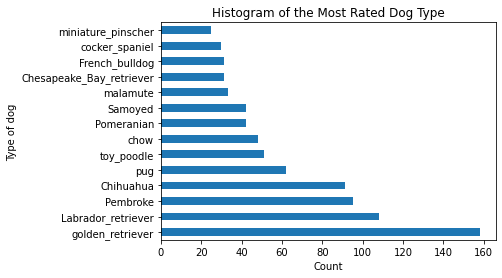

In [87]:
# Visualize with histogram to view dog_type greater than 25


df_dog_type = new_df.groupby('dog_type').filter(lambda x: len(x) >= 25)

df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight')

### Dog Stage Distribution

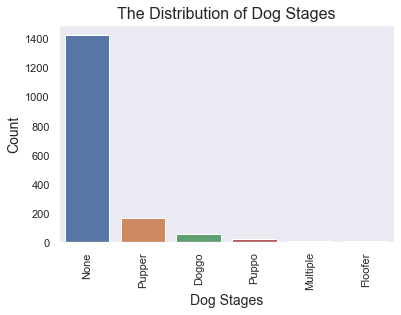

In [88]:
#use countplot to visualize dog stage distribution
sorted_stage = new_df['dogs_stage'].value_counts().index
sns.set(style="dark")
sns.countplot(data = new_df, x = 'dogs_stage', order = sorted_stage, orient = 'h')
plt.xticks(rotation = 90)
plt.xlabel('Dog Stages', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('The Distribution of Dog Stages',fontsize=16)

fig = plt.gcf() 
fig.savefig('output2.png',bbox_inches='tight')

### Correlation between Favorite count and Retweet count

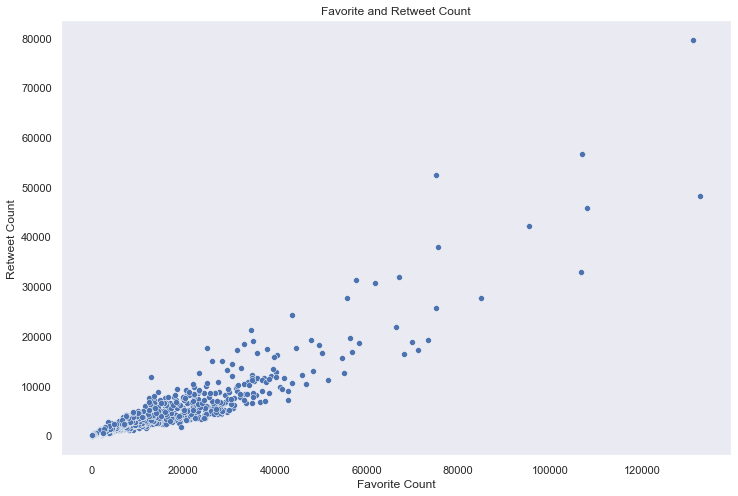

In [89]:
# Use scatterplot to visualize and determine correlation
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data=new_df, x='favorite_count', y='retweet_count')
plt.title('Favorite and Retweet Count')
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count');

fig = plt.gcf() 
fig.savefig('output3.png',bbox_inches='tight')

In [90]:
#use corr() to find correlation
new_df[['favorite_count', 'retweet_count']].corr()

,favorite_count,retweet_count
favorite_count,1.000000,0.913176
retweet_count,0.913176,1.000000


Both features have a high positive correlation of 0.91